In [ ]:
using CSV
using DataFrames
using Plots
using Eirene

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("C:\\Users\\cabet\\.julia\\packages\\Plots\\Pn7Zn\\src\\backends\\hdf5.jl", 35, UndefVarError(:Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x0000000065404881, Ptr{Nothing} @0x0000000065438664, Ptr{Nothing} @0x0000000065438e12, Ptr{Nothing} @0x000000006543883d, Ptr{Nothing} @0x0000000065439420, Ptr{Nothing} @0x000000006543a192, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x0000000065459e9d, Ptr{Nothing} @0x000000006545a623, Ptr{Nothing} @0x000000006545a931, Ptr{Nothing} @0x000000006545a931, Ptr{Nothing} @0x000000006545ba2f, Ptr{Nothing} @0x000000000fa893fa, Ptr{Nothing} @0x000000001ce97629, Ptr{Nothing} @0x000000001ce977a8, Ptr{Nothing} @0x000000001ce955dc, Ptr{Nothing} @0x000000001ce95644, Ptr{Nothing} @0x0000000065429d28, Ptr{Nothing} @0x000000001ce95482, Ptr{Nothing} @0x000000001ce954fa, Ptr{Nothing} @0x0000000065438e2c, Ptr{Nothing} @

WebIO._IJuliaInit()

Lo primero que haremos será crear un DataFrame con la información de un archivo .csv, el cual contiene los datos de algunos hoteles en Washington D. C., Estados Unidos.

In [ ]:
hotels = DataFrame(CSV.File("Hotels.csv")) 

,X,Y,NAME
,Float64,Float64,String?
1,-77.0268,38.9721,MOTEL 6 WASHINGTON DC
2,-77.0849,38.9608,EMBASSY SUITES BY HILTON WASHINGTON DC CHEVY CHASE PAVILION
3,-77.0354,38.9564,INTERNATIONAL GUEST HOUSE
4,-77.0656,38.947,DAYS INN BY WYNDHAM WASHINGTON DC/CONNECTICUT AVENUE
5,-77.0284,38.9299,ASANTE SANA INN
6,-77.0555,38.9282,THE KALORAMA GUEST HOUSE
7,-77.1027,38.9267,LUXBNB
8,-77.0537,38.9259,WOODLEY PARK GUEST HOUSE
9,-77.0547,38.9247,WASHINGTON MARRIOTT WARDMAN PARK


La siguiente línea nos permite apreciar la información de las primeras $3$ filas del archivo.

In [ ]:
first(hotels, 3) 

,X,Y,NAME
,Float64,Float64,String?
1,-77.0268,38.9721,MOTEL 6 WASHINGTON DC
2,-77.0849,38.9608,EMBASSY SUITES BY HILTON WASHINGTON DC CHEVY CHASE PAVILION
3,-77.0354,38.9564,INTERNATIONAL GUEST HOUSE


A continuación aislamos los datos de la primera y la segunda columna para todas las filas ya que estos nos dan la información acerca de la ubicación espacial (latitud y longitud) de los hoteles.

In [ ]:
hotelsxy = hcat(hotels[:, 1], hotels[:, 2]) 

169×2 Matrix{Float64}:
 -77.0268  38.9721
 -77.0849  38.9608
 -77.0354  38.9564
 -77.0656  38.947
 -77.0284  38.9299
 -77.0555  38.9282
 -77.1027  38.9267
 -77.0537  38.9259
 -77.0547  38.9247
 -77.0416  38.9245
 -77.0728  38.9233
 -77.0417  38.9228
 -77.0537  38.9226
   ⋮       
 -77.0244  38.8839
 -77.0159  38.8836
 -77.0305  38.8836
 -76.9921  38.8834
 -77.018   38.8831
 -77.025   38.8794
 -77.0097  38.879
 -77.0234  38.8785
 -77.004   38.8777
 -77.0073  38.8767
 -77.0062  38.8759
 -77.0062  38.875

Ahora graficamos la información. Es decir, cada punto de la siguiente gráfica representa la ubicación de un hotel. 

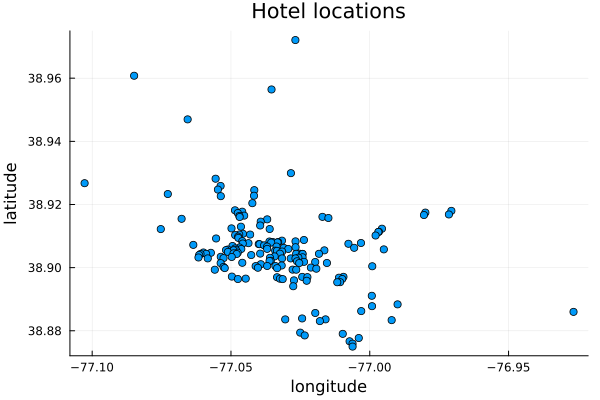

In [ ]:
scatter(hotelsxy[:, 1], hotelsxy[:, 2], 
    legend = false, 
    title = "Hotel locations",
    xlabel = "longitude",
    ylabel = "latitude")

En este punto comienza el análisis.

Llamamos a la librería Eirene. Ella espera que los datos (en este caso los puntos que identifican a los hoteles) estén dados como columnas y no como filas, por lo que hacemos una trasposición para poder colocar la información como argumento de la función.

Usamos model para especificar el tipo de datos que le estamos entregando. En este caso estamos usando una nube de puntos, por tanto escribimos pc (point cloud).

In [ ]:
eireneoutput = eirene(transpose(hotelsxy), model = "pc")


Dict{String, Any} with 12 entries:
  "symmat"   => [13960 13944 … 404 0; 13944 13960 … 432 0; … ; 404 432 … 13960 …
  "maxnz"    => [0, 5069, 212888, 1, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  161, 162, 163, 164, 165, 16…
  "cyclerep" => [Vector{Int64}[], [[1, 2], [13, 18], [40, 34], [4, 8], [15, 12]…
  "phi"      => [Int64[], [1, 1943, 4989, 502, 1785, 335, 1944, 6, 1006, 13952 …
  "plo"      => [Int64[], [2, 18, 34, 8, 12, 5, 19, 7, 26, 164  …  1, 149, 114,…
  "ocg2rad"  => [0.0913222, 0.0912357, 0.0909622, 0.090881, 0.0908798, 0.090581…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  160, 161, 162, 163, 164, 16…
  "nvl2ovl"  => [71, 65, 106, 80, 100, 62, 88, 81, 112, 113  …  21, 4, 18, 3, 2…
  "input"    => Dict{String, Any}("genera"=>[-77.0268 -77.0849 … -77.0062 -77.0…
  "tid"      => [Int64[], [2, 18, 34, 8, 12, 5, 19, 7, 26, 164  …  149, 114, 3,…
  "grain"    => [[13960, 13960, 13960, 13960, 13960, 13960, 13960, 13960, 13960…

Queremos una versión resumida de toda la información que se obtiene en la línea anterior.

Usamos $dim = 1$ para analizar ciclos. Usar $dim = 0$ nos daba información acerca de componentes conexas.

Observemos que para cada ciclo nos da 2 números. Estos números nos están ofreciendo información acerca del rango de los valores que nos dan ciclos.

Un rango muy grande nos conecta todos los ciclos y uno muy pequeño los desaparece. Acá se calculó el rango ideal.

In [ ]:
bc = barcode(eireneoutput, dim = 1)


34×2 Matrix{Float64}:
 0.00150878  0.00165984
 0.00173635  0.00176505
 0.00175794  0.00218756
 0.00279334  0.00351816
 0.00343089  0.00347307
 0.00996504  0.0106152
 0.0103512   0.0106323
 0.012491    0.0125514
 0.00113868  0.00135763
 0.0016926   0.00172603
 0.00207491  0.00209796
 0.0023452   0.00340424
 0.00238183  0.00269836
 ⋮           
 0.00462077  0.0060454
 0.00513321  0.00553646
 0.00516484  0.00621101
 0.0062538   0.00636612
 0.00841547  0.00847825
 0.0106867   0.0116031
 0.011907    0.0122099
 0.0179066   0.0193982
 0.0316682   0.0328436
 0.0384261   0.0393731
 0.00389228  0.00441162
 0.0106646   0.0131199

El rango más grande nos dará el ciclo más persistente.

In [ ]:
persistence = bc[:, 2] - bc[:, 1] 

34-element Vector{Float64}:
 0.00015106376880259114
 2.8697907842755886e-5
 0.00042961727252648855
 0.0007248191072139376
 4.2185820940380484e-5
 0.0006501467946888207
 0.0002811764623567893
 6.047579349287638e-5
 0.0002189557262330811
 3.343337005122515e-5
 2.305124045387649e-5
 0.0010590461739548042
 0.00031653029984167816
 ⋮
 0.0014246261238011907
 0.0004032546135380108
 0.001046173412737405
 0.00011231623919499834
 6.278145781155042e-5
 0.0009164807633711379
 0.0003028911705202971
 0.001491579456282352
 0.0011754034143628203
 0.0009469637678818504
 0.0005193358613183618
 0.0024552788524434682

Tomamos el valor más grande.

In [ ]:
mpcindex = argmax(persistence) 

34

Nos da las parejas de hoteles conectados que generan ese ciclo.

In [ ]:
classrep(eireneoutput, class = mpcindex, dim = 1) 

2×34 Matrix{Int64}:
 105  74  68  79  154  154  132  119  94  …  115  128  164  58  166  152  157
 111  42  58  92  152  155  128  114  89     103  115  159  79  155  126  148

Miramos los valores de los hoteles en específico (saber cuáles hoteles son).

In [ ]:
mpchotels = unique(classrep(eireneoutput, class = mpcindex, dim = 1)) 

34-element Vector{Int64}:
 105
 111
  74
  42
  68
  58
  79
  92
 154
 152
 155
 132
 128
   ⋮
 159
 162
 135
 116
 126
  55
 138
 103
 157
 166
 164
 115

Acá obtenemos la información sobre la ubicación de dichos hoteles.

In [ ]:
mpcxy = hotelsxy[mpchotels, :] 

34×2 Matrix{Float64}:
 -77.0257  38.9032
 -77.0268  38.9029
 -76.9949  38.9058
 -76.9979  38.9102
 -77.0056  38.9063
 -77.0077  38.9076
 -77.0164  38.9055
 -77.0183  38.9044
 -76.9992  38.8878
 -76.9993  38.8911
 -77.0031  38.8862
 -77.0193  38.8997
 -77.0212  38.9
   ⋮       
 -77.0159  38.8836
 -77.018   38.8831
 -77.0265  38.8993
 -77.0197  38.9018
 -76.9991  38.9004
 -77.0032  38.9078
 -77.0243  38.8971
 -77.0242  38.9033
 -77.0196  38.8856
 -77.004   38.8777
 -77.0097  38.879
 -77.0237  38.9018

Graficamos la información obtenida en naranja.

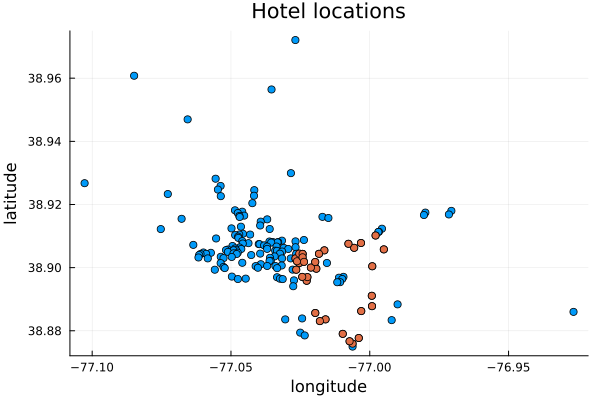

In [ ]:
scatter!(mpcxy[:, 1], mpcxy[:, 2]) 

## Conclusiones

Tal como pudimos ver en la imagen, el ciclo presentado en naranja representa a un "hueco" en los datos. Esta información puede ser de vital importancia en el plan de ordenamiento territorial de la ciudad. Desde el punto de vista de los juegos no cooperativos en economía podemos pensar en las decisiones que pueden tomar ese colectivo de hoteles tanto para su bienestar específico, como para su beneficio grupal. Una propuesta que surge de manera natural es, con la intención de volver ese espacio de la ciudad un sitio más turístico, crear una locación cultural que conste de restaurantes con comidas típicas, bares temáticos y demás lugares llamativos para así conseguir incentivar al visitante a hospedarse en ese conjunto de hoteles en específico. Otra propuesta que puede surgir es colocar en esa locación una estación de transporte público (dígase tren, buses, bicicletas, scooters, helipuertos, etc.) para, de igual manera, incentivar la estadía en los hoteles en cuestión.

Cabe destacar que la idea de identificar agujeros puede ser de utilidad en diversos ámbitos. Otro ejemplo de una posible implementación es, con los datos de ubicación de polución o de calidad del aire de una ciudad, poder tomar acciones para mejorar la calidad del aire en esos sectores. O bien una implementación diferente puede nacer de los deportes. Adquiriendo los datos de la ubicación de la posesión del balón en un partido de fútbol podría ser posible estudiar los sectores donde más se tiene tenencia y el cómo se da dicha tenencia del balón. Todo lo anterior depende de los datos que se obtengan. Una implementación relacionada con la geografía viene dada directamente en el paquete de Eirene y puede ser encontrada en su documentación. Allí se estudian la conectividad de ciertos países y de ciertas regiones del mundo. 